# Applied Statistics Assessment

This notebook contains solutions to the assessment set in the module Applied Statistics (Winter 25/26) at ATU.

In [156]:
import numpy as np                  # https://numpy.org
import matplotlib.pyplot as plt     # https://matplotlib.org
from scipy import stats             # https://docs.scipy.org
from scipy.stats import norm        # https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.stats import f_oneway  
from statsmodels.stats.multicomp import pairwise_tukeyhsd # https://www.statsmodels.org/stable/index.html
import pandas as pd                 # https://pandas.pydata.org/docs/index.html
import seaborn as sns              # https://seaborn.pydata.org/index.html
import math                         # https://docs.python.org/3/library/math.html
import itertools                    # https://docs.python.org/3/library/itertools.html
import random                       # https://docs.python.org/3/library/random.html

## Problem 1: Extending the Lady Tasting Tea

>Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first. 
>
>Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.
>
>In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

The Lady Tasting Tea is a statistical experiment devised by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in the 1920s. It is a well known example of [hypothesis testing](https://www.geeksforgeeks.org/software-testing/understanding-hypothesis-testing/).

> A statistical hypothesis test is a method of statistical inference used to decide whether the data provide sufficient evidence to reject a particular hypothesis.

- https://en.wikipedia.org/wiki/Statistical_hypothesis_test

In his book [The_Design_of_Experiments](https://en.wikipedia.org/wiki/The_Design_of_Experiments) Fisher proposed the idea of the [null hypothesis](https://www.geeksforgeeks.org/maths/null-hypothesis/) and the Lady Tasting Tea.

Some interesting videos on the Lady Tasting Tea experiment:

- [Lady Tasting tea experiment - Numberphile](https://www.youtube.com/watch?v=8ERFV7rV0vg)

- [Lady Tasting tea experiment - Rob Sinn](https://www.youtube.com/watch?v=kR1qeXDwCSc) 


### P-Value 

> The p-value, or probability value, is a statistical measure used in hypothesis testing to assess the strength of evidence against a null hypothesis. 

- https://www.geeksforgeeks.org/machine-learning/p-value/

>In general, a small p-value indicates that the observed data is unlikely to have occurred by random chance alone, which leads to the rejection of the null hypothesis.

In [157]:
# Define the number of cups
num_cups = 12

# Define the number of cups with milk first
num_cups_milk_first = 4

# Define the number of cups with tea first
num_cups_tea_first = 8

We can make a list of numbers representing the 12 cups of tea.

In [158]:
cups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

We will select 4 cups from the 12.

If there are 12 cups of tea, how many different ways are there of selecting 4 cups from them? This can be calculated using the binomial coefficient:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

The function `math.comb()` will calculate the binomial coefficient (also known as the N choose K formula).

- https://www.geeksforgeeks.org/maths/n-choose-k-formula/

> Combination is described as the process of choosing one, two, or a few elements from a given sequence, independent of the order in which they appear.

So Order doesnt matter.

But you can't pick the same cup more than once in this experiment.


So if we have 1 2 3 4 5 6 7 8 9 10 11 12 

and pick four for example like this 2 5 7 8, its the same as 5 7 2 8 as order doesn't matter

but if we select one, then there is 11 other cups to choose from then, not 12 anymore.

$ C(n, k) = \frac{n!}{k!(n-k)!} $
 
- n! is the factorial of n.
- k! is the factorial of k.


Putting that into Python code:

In [159]:
# Pick some example values
n = 12  # Total number of elements, here it is the total cups of tea
k = 4   # Number of elements to choose, here it is the 'milk-first' choices

# Calculate the number of ways of selecting k objects from n without replacement and without order
result = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Display result
result

495

We can use the [`math`](https://docs.python.org/3/library/math.html) library, specifically the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function to do this for us.

In [160]:
# Calculate combinations using math.comb
result = math.comb(n, k)

# Print result
print(f"The number of ways to choose {k} elements from {n} is: {result}")

The number of ways to choose 4 elements from 12 is: 495


[`Itertools`](https://docs.python.org/3/library/itertools.html) has a function called [`combinations`](https://docs.python.org/3/library/itertools.html#itertools.combinations). It uses `math.comb()` under the hood.

- https://www.geeksforgeeks.org/python/python-itertools-combinations-function/

`itertools.combinations(iterable, r)`

`Return r length subsequences of elements from the input iterable.`

In [161]:
# Simple example of 3 elements, return all possible unordered pairs of elements
example = list(itertools.combinations("123", 2))

# Display result
print(example)

[('1', '2'), ('1', '3'), ('2', '3')]


Now to use 12 cups, where we select 4

The `cups` list is the iterable, `num_cups_milk_first` is the number of subsequences to be selected from the iterable.

In [162]:
# Determine the different ways of selecting milk-first cups out of the total number of cups of tea
combinations = list(itertools.combinations(cups, num_cups_milk_first)) # 'cups' is the list of cup labels

# Print (truncated))
for combination in combinations[:13]:
    print(combination)
print('...')

(1, 2, 3, 4)
(1, 2, 3, 5)
(1, 2, 3, 6)
(1, 2, 3, 7)
(1, 2, 3, 8)
(1, 2, 3, 9)
(1, 2, 3, 10)
(1, 2, 3, 11)
(1, 2, 3, 12)
(1, 2, 4, 5)
(1, 2, 4, 6)
(1, 2, 4, 7)
(1, 2, 4, 8)
...


Those are all unique combinations (without thinking about the order of them), there is no repetition. There is 2,3,4,5 - you wont see 2,4,3,5. There are 495 rows as calculated by the formula in `results` above.

In [163]:
# Count the number of combinations
count = len(combinations)

# Print the count
print(f'Total number of combinations: {count}')

Total number of combinations: 495


Now the experiment bit. Shuffle the 12 cups, select 4 at random. We can use the [`random`](https://docs.python.org/3/library/random.html) module. It's a pseudo-random number generator.

Use a set instead of a list. Why? A set is unordered, lists are ordered.

- https://www.geeksforgeeks.org/python/sets-vs-lists-python/

In [164]:
# Select 4 at random, convert to a set in-line
milk_first = set(random.sample(cups, num_cups_milk_first))

# Display the set
milk_first

{2, 3, 7, 11}

It looks like it sorts them automatically in numerical order. We are using numbers as labels, the cups are not in any particular order.

So if we get {1, 6, 7, 11} it has zero overlap with {2, 5, 8, 10}. It has 100% overlap with {1, 6, 7, 11}.

Chances of selecting 4 correct cups from the 495 unique combinations?

In [165]:
probability = 1/495

probability

0.00202020202020202

### Simulate randomly selecting 4 cups as the 'milk-first' cups

In [166]:
# Say 1, 4, 5, 8 are the "correct" cups
correct_cups = {1,4,5,8}

# Define the number of simulations
num_trials = 10000

# Create an array to hold success counts for the simulation
success_count = 0

# Run the simulation
for i in range(num_trials):
    # Shuffle the cups randomly
    np.random.shuffle(cups)
    
    # Select the cups as milk-first
    selected_cups = random.sample(cups, k)
    
    # Check if the selected cups match the correct cups
    if set(selected_cups) == set(correct_cups):
        success_count += 1

# Calculate the probability
probability = success_count / num_trials

# Print results
print(f"Simulated Probability of correctly identifying all {k} cups by chance: {probability:.4f}")

Simulated Probability of correctly identifying all 4 cups by chance: 0.0028


Compared to original experiment, there is a much lower probability of randomly selecting the correct 4 cups, as there are a lot more combinations (495 vs original 70). 

A note on interpreting p-value:

- https://en.fernandafperes.com.br/blog/phd-tastes-tea/

A lower p-value indicates a greater likelihood of rejecting the null hypothesis.

In [167]:
p_original = (1/70) * 100
print(f"Original p-value: {p_original:.3f}%")

p_extended = (1/495) * 100
print(f"Extended exp. p-value: {p_extended:.3f}%")

Original p-value: 1.429%
Extended exp. p-value: 0.202%


So maybe tighten the p-threshold because of the low probability of selecting 4 correct cups out of 495 combinations. Lower p-value threshold minimises [Type I errors](https://www.geeksforgeeks.org/data-science/type-i-and-type-ii-errors/) (false positive) as only strong evidence will lead to rejecting the null hypothesis.

## Problem 2: Normal Distribution

>Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

How to generate random numbers following a Normal Distribution using the `numpy.random.normal()` method:

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

- https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/

From the NumPy docs:

>`loc`: Mean (“centre”) of the distribution.
>
>`scale`: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
>
>`size`: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.


In [168]:
# Define number of samples to generate
n_samples = 10

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples))

# Display
samples

array([ 0.72540334, -0.87108761,  0.76429885, -1.56431321, -0.97210381,
       -2.6583388 ,  0.2164503 ,  0.34146821,  0.33339778, -1.82131085])

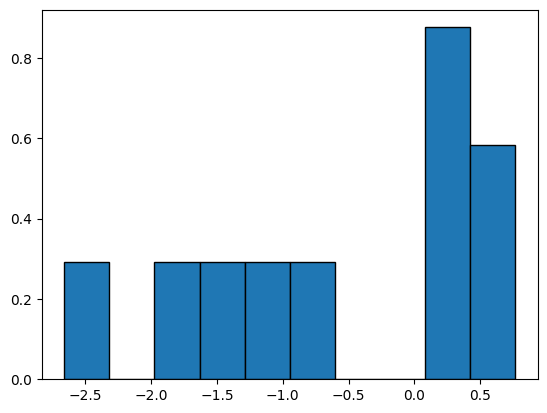

In [169]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot histogram
ax.hist(samples, edgecolor='black', density=True);

Now use a two-dimensional array, 100,000 x 10 .

We will get 100,000 rows and 10 columns of samples.

The x-axis is continuous so we plot a histogram using matplotlib [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

Note: standard normal distribution means loc (mean) is zero and scale (std deviation) is 1

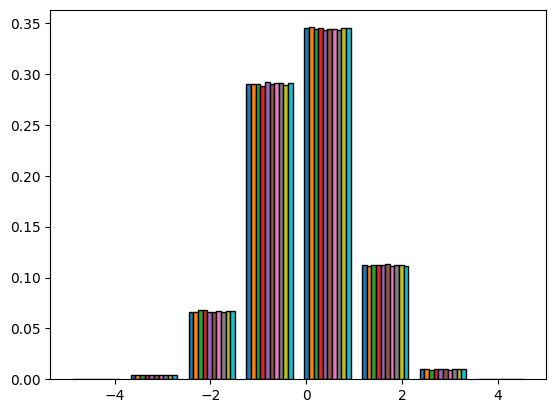

In [170]:
# Define number of samples to generate, and 
n_samples = 100000
sample_size = 10

# Generate samples from the standard normal distribution (ie loc is 0, scale is 1)
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(samples, bins=8, edgecolor='black', density=True);

From the `numpy` docs, using delta degrees of freedom (ddof).

We can calculate `population standard deviation` using `ddof=0`.

Likewise, we can calculate the `sample standard deviation` by setting `ddof=1`.

- https://numpy.org/doc/stable/reference/generated/numpy.std.html

- https://mathmonks.com/standard-deviation/population-and-sample-standard-deviation

>The population standard deviation represents the entire population of an area under consideration, such as a national census or during a financial report. Thus, it includes all individuals in a population.

>The sample standard deviation estimates the standard deviation of a dataset, which is a subset of the population.

In [171]:
# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Calculate population standard deviations (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

Put both on same plot:

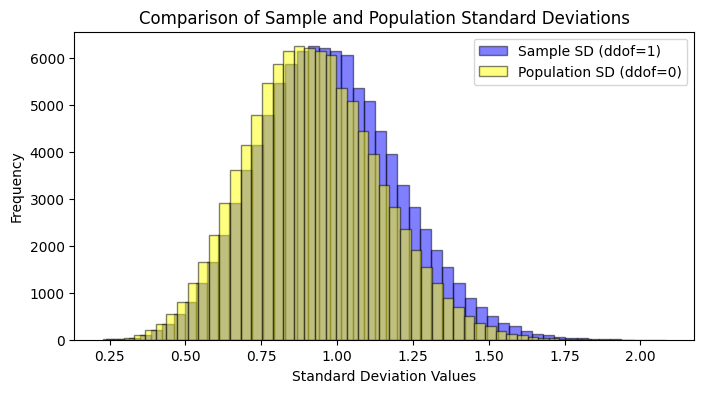

In [172]:
# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histograms for sample and population standard deviations.
ax.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', edgecolor='black')
ax.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations')
ax.set_xlabel('Standard Deviation Values')
ax.set_ylabel('Frequency')
ax.legend();

If we use a larger sample size?

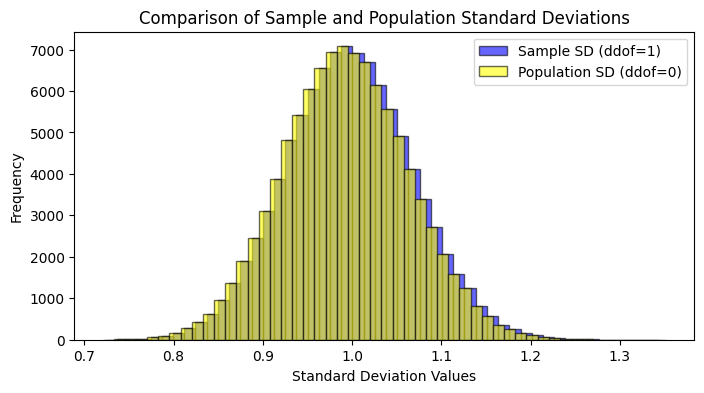

In [173]:
# Define number of samples to generate, and 
n_samples = 100000
sample_size = 100

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Calculate population standard deviations (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histograms for sample and population standard deviations.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black')
ax.hist(population_sd, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Add titles and labels
ax.set_title('Comparison of Sample and Population Standard Deviations')
ax.set_xlabel('Standard Deviation Values')
ax.set_ylabel('Frequency')
ax.legend();

The distributions appear to overlap more as the sample size increases.

- A larger sample size will result in the sample distribution being closer to or tighter around the population mean of the original distribution

standard deviation decreases (still centered on the same mean) as sample size increases, you getting a more accurate estimate of the population mean

something about the central limit theorem

Now add the bell curve to the plot. 


### Probability Density Function

$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

https://en.wikipedia.org/wiki/Normal_distribution

We should convert the y-values to probablility density:

- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

This returns a 'probability density'

> each bin will display the bin's raw count divided by the total number of counts`

The histogram is normalised so that the area under the histogram sums to 1. The height of each bin represents the probability density, rather than raw counts.

Generate random number using [`Generator`](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start)

standard error, used for plotting the curve

- https://en.wikipedia.org/wiki/Standard_error

We cna use `scipy.stats` to perform normalisation for calculating the probability density function (PDF) of a normal distribution

The `norm.pdf` function calculates the PDF using the normalisation constant and the exponential factor.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

https://www.geeksforgeeks.org/python/how-to-calculate-probability-in-a-normal-distribution-given-mean-and-standard-deviation-in-python/

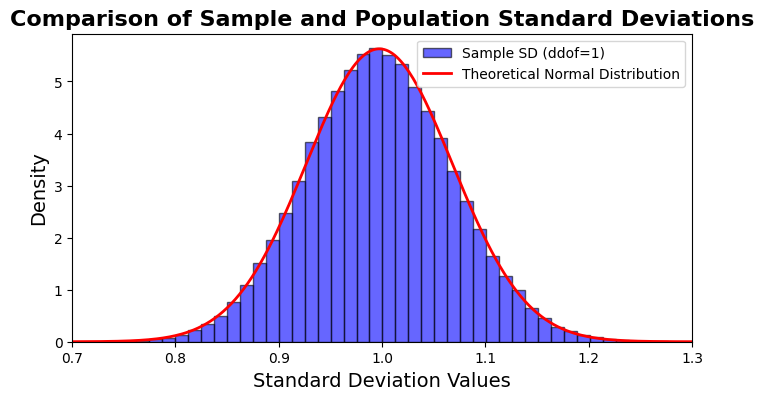

In [174]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histogram for sample standard deviations with normalisation
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black', density=True)

# Add titles and labels
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Set x-axis limits
ax.set_xlim(0.7, 1.3)

# Create an x range for the theoretical curve
x = np.linspace(0, 2, 1001)

# Use scipy to get the theoretical PDF values
y = norm.pdf(x, loc=np.mean(sample_sd), scale=np.std(sample_sd, ddof=1))  # PDF for a normal distribution

# Plot the theoretical PDF curve
ax.plot(x, y, 'r-', label='Theoretical Normal Distribution', linewidth=2)
ax.legend();

SciPy has a module called `scipy.stats` which has a function called `probplot` which plots quantiles of a dataset against the quantiles of a theoretical distribution.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

> Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). `probplot` optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

- https://www.statology.org/qq-plot-interpretation/

> A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution.

We can use a QQ plot if we want to figure out if a set of data is normally distributed. If we didnt know, we could use a QQ plot and if the data fits the diagonal line (even if the tails deviate slightly) then the data is normally distributed.

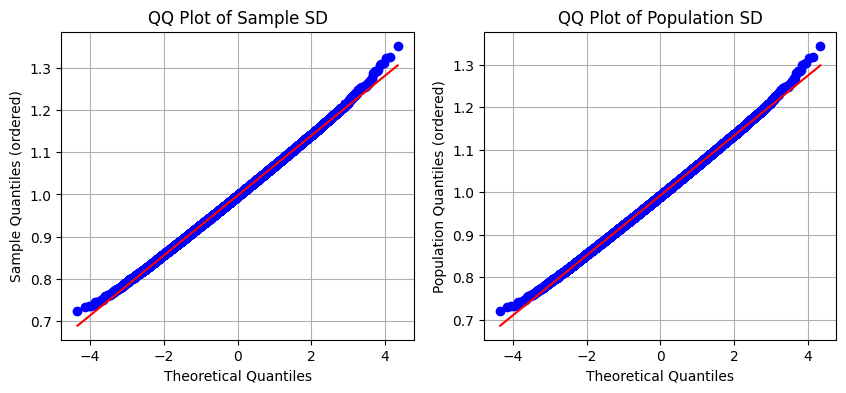

In [175]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Create a QQ plot for the sample
stats.probplot(sample_sd, dist='norm', plot=ax1)
ax1.set_title('QQ Plot of Sample SD')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles (ordered)')
ax1.grid()

# Create a QQ plot for the population
stats.probplot(population_sd, dist='norm', plot=ax2)
ax2.set_title('QQ Plot of Population SD')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Population Quantiles (ordered)')
ax2.grid();

## Problem 3: t-Tests

>A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference `d = 0, 0.1, 0.2, … , 1.0`, repeat the following simulation 1,000 times:
>
>1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean `d` and standard deviation 1.
>2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
>Record the proportion of times the null hypothesis is not rejected.
>3. Plot this proportion against `d`, and explain how the type II error rate changes as the difference in means increases.

A type II error is a false negative.

- https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

- https://www.geeksforgeeks.org/maths/t-test-in-statistics/

In [176]:
# Generate values using numpy from 0 to 1.0 with an incrememt of 1.0.
mean_differences = np.arange(0, 1.1, 0.1)

# Define the number of simulations
n_simulations = 1000

n_samples = 100

The `scipy.stats.ttest_ind` function can be used to conduct an independent samples t-test, returning the t-statistic and p-value.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

From the SciPy docs:

> The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means.

The formula for the independent samples t-test (assuming equal variance and sample size) is:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{2}{n}}}$$

Where $s_p$ is the pooled standard deviation:$$s_p = \sqrt{\frac{s_1^2 + s_2^2}{2}}$$

- https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Statistics%3A_Open_for_Everyone_(Peter)/08%3A_Independent_Samples_t-Tests/8.03%3A_The_Independent_Samples_t-Test_Formula


Used to check if there is a statistically significant difference between two independent groups of (normally distributed) data.

> This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

The null hypothesis $H_0$ - when the population means are equal

$$H_0: \mu_1 = \mu_2$$


- https://pythonguides.com/python-scipy-ttest_ind/

If the peaks of two distributions overlap a lot (roughly speaking), then you would fail to reject the null hypothesis.

It can help identify is something is statistically relevent or if it is something that happened by chance.

For each mean difference, we can generate the two samples and perform the t-test.

In [177]:
for d in mean_differences:
    sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)
    sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

    t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

    print(f'p-value: {p_value}')

p-value: 0.004827227832335645
p-value: 0.6433036421937315
p-value: 0.20179709537761256
p-value: 0.00202510574863639
p-value: 0.002823200610687301
p-value: 4.3218072800296883e-05
p-value: 9.591359682479503e-05
p-value: 8.470403974198932e-09
p-value: 1.704270962488846e-05
p-value: 6.858728213278813e-10
p-value: 4.073861803807599e-09


Note the p-value getting lower as the mean increases. The distributions 'overlap' less.

For each mean difference we can run the simulation 1000 times and record the proportion of times the null hypothesis is not rejected.

In [178]:
# List to store error rates
type_ii_error_rates = []

# Run simulation 
for d in mean_differences:
    # Count type 2 errors (not rejected)
    type_ii_errors = 0

    for i in range(n_simulations):    
        # standard normal dist
        sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

        # normal distribution (loc is the mean of the normal distribution remember)
        sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

        # Perform the t-test
        t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

        # Reject if 
        if p_value >= 0.05:
            type_ii_errors +=1

    # Calculate the type II error rate (proportion not rejected)
    type_ii_error_rate = type_ii_errors / n_simulations
    type_ii_error_rates.append(type_ii_error_rate)

Visualise the Type II Error rate:

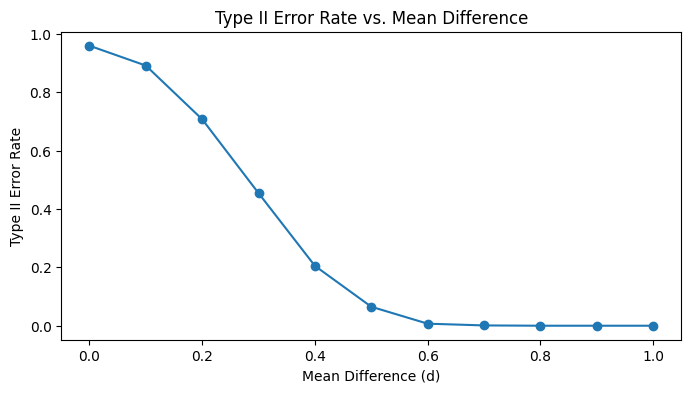

In [179]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(mean_differences, type_ii_error_rates, marker='o')

# Decorate teh plot
ax.set_xlabel("Mean Difference (d)")
ax.set_ylabel("Type II Error Rate")
ax.set_title("Type II Error Rate vs. Mean Difference");

As the mean increases, the type two error rate decreases. The chance of failing to reject the null hypothesis drops toward zero as the mean (d) increases.

A larger mean difference (or [effect size](https://www.statology.org/effect-size/)) indicates a more significant difference between the samples, which leads to greater [statistical power](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/statistical-power/) (the probability of correctly rejecting the null hypothesis when it is false). Conversely, when the means are closer together, the differences become less pronounced, resulting in lower statistical power and a higher likelihood of a type II error.

Its helpful to visualise the the distributions as the mean increases:

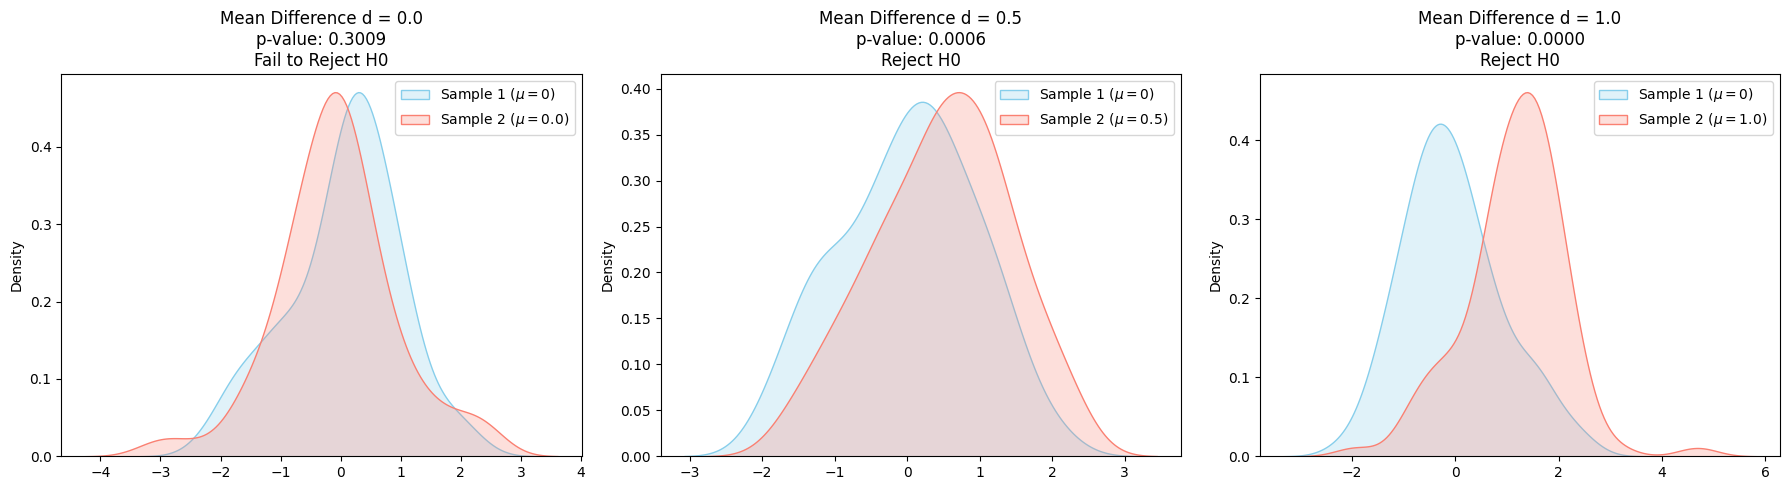

In [180]:
# Create figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Initialize a counter to track which subplot to use
plot_index = 0

for d in mean_differences:
    sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)
    sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

    t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

    # Only plot for these specific values
    if d in (0, 0.5, 1.0):
        sns.kdeplot(sample_1, fill=True, color="skyblue", label="Sample 1 ($\mu=0$)", ax=axes[plot_index])
        sns.kdeplot(sample_2, fill=True, color="salmon", label=f"Sample 2 ($\mu={d}$)", ax=axes[plot_index])
        
        # Formatting
        decision = "Reject H0" if p_value < 0.05 else "Fail to Reject H0"
        axes[plot_index].set_title(f"Mean Difference d = {d}\np-value: {p_value:.4f}\n{decision}")
        axes[plot_index].legend()
        
        # Move to the next subplot for the next d value
        plot_index += 1

plt.tight_layout()
plt.show()

## Problem 4: ANOVA

>Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.
>
>1. Perform a one-way ANOVA to test whether all three means are equal.
>2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
>3. Compare the conclusions.
>
>Write a short note on why ANOVA is preferred over running several t-tests.

In [181]:
# Define size and standard deviation
size = 30
std_dev = 1

# Generate samples
sample_1 = np.random.normal(loc=0, scale=std_dev, size=size)
sample_2 = np.random.normal(loc=0.5, scale=std_dev, size=size)
sample_3 = np.random.normal(loc=1, scale=std_dev, size=size)

ANOVA (analysis of variance) is used when we have more than two groups of data.

https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/

We can use `scipy.stats` function `f_oneway` to perform ANOVA 

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [182]:
f_statistic, p_value = f_oneway(sample_1, sample_2, sample_3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 11.501115792827784
P-value: 3.6993244900851114e-05


>F-statistic: It measures the variance between the groups relative to the variance within the groups.

>P-value: It helps determine if the results are statistically significant.

We can tell by the p-value whether all 3 means are equal.

> if p is low, the null must go

- https://stats.stackexchange.com/questions/501835/trick-to-remember-when-to-reject-null-p-values-vs-alpha

If the p-value is low then we reject the null hypothesis. $p$-value is the probability of seeing a large difference if the null hypothesis were actually true

In [183]:
if p_value < 0.05:
    print("Reject null hypothesis >> there is evidence that the means are not all equal")
else:
    print("Fail to reject null hypothesis >> results are not significant")

Reject null hypothesis >> there is evidence that the means are not all equal


Both t-test and ANOVA are used in hypothesis testing. T-test is limited to towo groups of data, whereas ANOVA can be used for two or more groups.

- https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/

There are two types of ANOVA:

- One way ANOVA: comparing means across one independent variable with multiple levels

- Two way ANOVA: analyzing two independent variables and their interaction effects

If results are significant you could then perform [Tukey's HSD](https://en.wikipedia.org/wiki/Tukey%27s_range_test) to perform pairwise comparisons between group means to identify specifically which groups are significantly different.

- https://fastercapital.com/content/Tukey-s-HSD--Post-Hoc-Analysis-after-ANOVA.html

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Sample 1 Sample 2   0.6767 0.0089  0.1447 1.2086   True
Sample 1 Sample 3   1.0561    0.0  0.5241  1.588   True
Sample 2 Sample 3   0.3794 0.2107 -0.1525 0.9114  False
-------------------------------------------------------


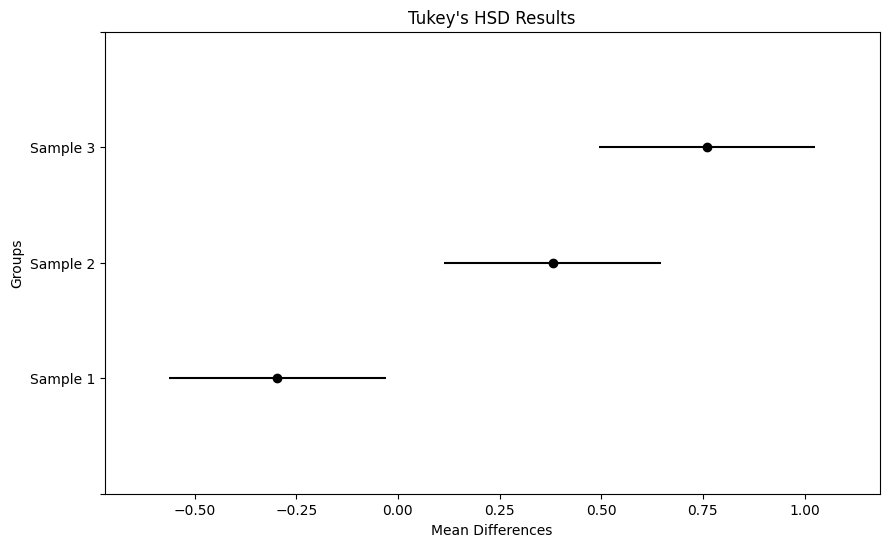

In [184]:
# Combine samples into a DataFrame
data = pd.DataFrame({
    'value': np.concatenate([sample_1, sample_2, sample_3]),
    'group': ['Sample 1'] * size + ['Sample 2'] * size + ['Sample 3'] * size
})

tukey_results = pairwise_tukeyhsd(data['value'], data['group'])
print(tukey_results)
    
# Plot
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Results")
plt.xlabel("Mean Differences")
plt.ylabel("Groups")
plt.show()

If the confidence intervals do not overlap, then it suggests a statistically significant difference between the groups.

- https://www.statology.org/tukey-test-python/

***

END